In [ ]:
1. BBC news has by far the most positive sentiment analysis while 
fox is the only other outlet with a positive value.

2. The New York Times has significantly more negative sentiment than other outlets while
CNN has moderately negative tweet sentiment.

3. Though the tweet polarity of each news outlet changes semi-regularly, the NY Times has consistently 
had the most negative tweet sentiment while BBC has conversely had the most positive tweet sentiment. 
This may reflect a British or generally foreign view of work affiars while the NY Times might represent
a more liberal-domestic veiwpoint of current world affairs. Fox, on the other hand, which has had a
slightly positive tweet sentiment might represent the convservative domestic perception of world affairs.

In [41]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [42]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [43]:
news_outlet = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# List for tweet data
table_dict = []

# Loop through all targets
for outlet in news_outlet:
    counter=101
    public_tweets = api.user_timeline(outlet, count=100, result_type="recent")

    #     tweetstorage[target]= public_tweets
    for tweet in public_tweets:

        # Run Vader analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweetorder=counter-1
        counter=counter-1
        
        #Temporarily store other values
        date=time.strftime('%m/%d/%Y', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        text=(tweet["text"])
        name=(tweet["user"]["name"])

        #append stored value to DataFrame
        table_dict.append({"Media Sources":name,"Tweet Polarity":compound,"Positive":pos,"Neutral":neu,
                          "Date":date,"Text":text,"Tweets Ago":tweetorder})
        
table_dict=pd.DataFrame(table_dict)
table_dict.head()

,Date,Media Sources,Neutral,Positive,Text,Tweet Polarity,Tweets Ago
0,07/18/2018,BBC News (UK),1.000,0.000,Sir Cliff Richard: BBC bosses 'should carry th...,0.0000,100
1,07/18/2018,BBC News (UK),0.571,0.105,'Stupid statements' - Trump WW3 jibe stuns Mon...,-0.5106,99
2,07/18/2018,BBC News (UK),0.621,0.180,"Men steal cabinet of phones valued at £2,500 f...",-0.0772,98
3,07/18/2018,BBC News (UK),0.656,0.000,Transgender inmate charged with sex offences a...,-0.4939,97
4,07/18/2018,BBC News (UK),1.000,0.000,Cliff Richard: BBC bosses 'should carry the ca...,0.0000,96


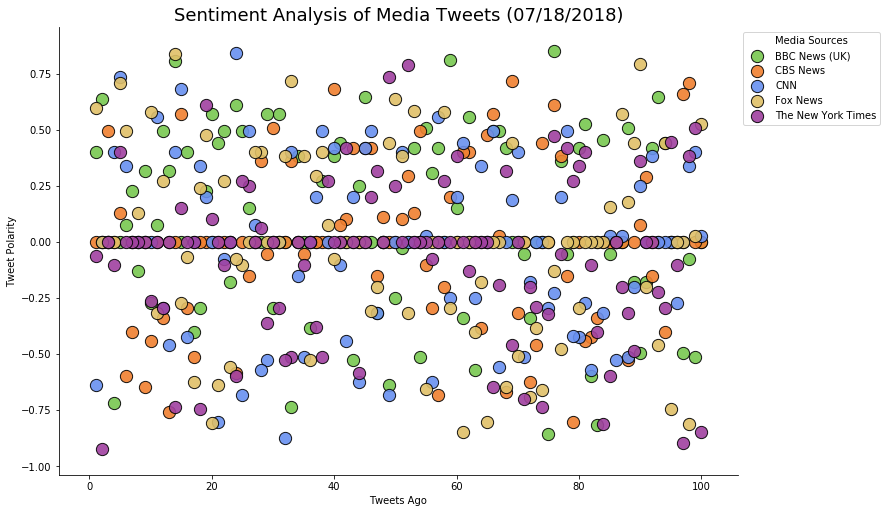

In [47]:
#set colorlist for charts
colors = ['#78C850', '#F08030', '#6890F0', '#E0C068', '#A040A0']
sns.set_palette(colors)

#create lmplot using seasborn, format legend, legend location, plot indicators and remove regression line
MediaMood=sns.lmplot(x="Tweets Ago", y="Tweet Polarity", data= table_dict, 
           hue="Media Sources",  size=7, aspect=1.5 ,
           legend_out = True, legend = False, fit_reg=False,
           scatter_kws={"s":150,'alpha':.9,'edgecolors':"black",},ci=0)

#format scatter plott layout, title and legent
plt.tight_layout()
plt.title("Sentiment Analysis of Media Tweets ("+str(table_dict["Date"][0])+")", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, title="Media Sources")

plt.savefig('Analysis/Output1')
plt.show(MediaMood)

In [48]:
#create dataframe for average tweet polarity per news source using groupby
news_sentiment = pd.DataFrame(table_dict.groupby(['Media Sources'])['Tweet Polarity'].mean()).reset_index()
news_sentiment

,Media Sources,Tweet Polarity
0,BBC News (UK),0.082214
1,CBS News,-0.003078
2,CNN,-0.016763
3,Fox News,-0.002151
4,The New York Times,-0.067721


C:\Users\Bates\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


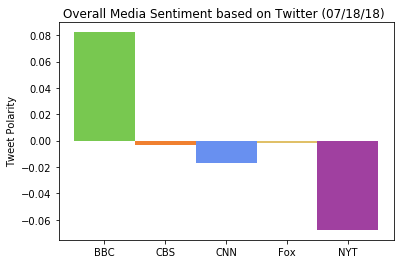

In [49]:
# Create Variable using Tuples from 'Tweet Polarity'
tweets_polarity = news_sentiment['Tweet Polarity']

# Generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))  
width = 1
rect1 = ax.bar(ind[0], tweets_polarity[0], width, color='#78C850')
rect2 = ax.bar(ind[1], tweets_polarity[1], width, color='#F08030')
rect3 = ax.bar(ind[2], tweets_polarity[2], width, color='#6890F0')
rect4 = ax.bar(ind[3], tweets_polarity[3], width, color='#E0C068')
rect5 = ax.bar(ind[4], tweets_polarity[4], width, color='#A040A0')

#Format Bar Graph
ax.set_ylabel("Tweet Polarity")
ax.set_title("Overall Media Sentiment based on Twitter (%s) " % (time.strftime("%x")))
ax.set_xticks(ind)
ax.set_xticklabels(("BBC", "CBS", "CNN", "Fox", "NYT"))
ax.set_autoscaley_on(True)

plt.savefig('Analysis/Output2')
fig.show()